# Transition dipole matrix elements

In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append("../src/")

import absorption
import read_files

In [3]:
run = "300ps_2fs"
LHII_data = read_files.all_LHII_data(run, 3000, True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.00it/s]
150000it [00:31, 4774.62it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 78.36it/s]


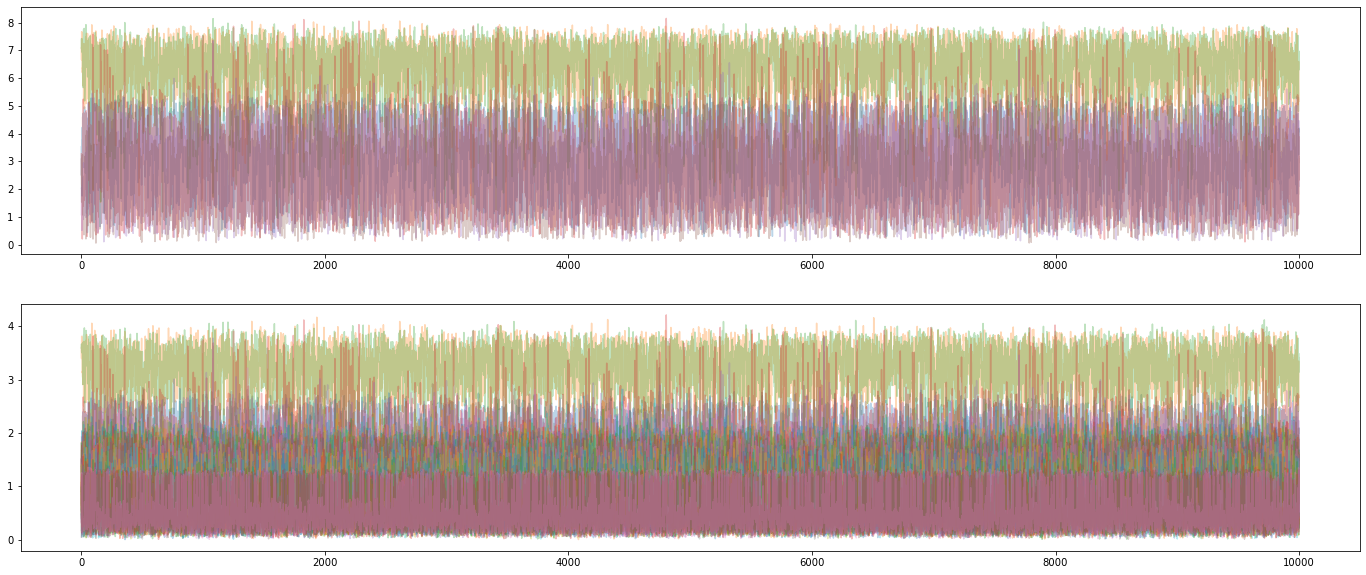

In [4]:
lights, spheres = absorption.probabilities(LHII_data["eigvec"][:10000], LHII_data["dipoles"][:10000])

fig, ax = plt.subplots(2, 1, figsize=(24, 10))
ax[0].plot(spheres[:, 0:6], alpha=0.3);
ax[1].plot(lights, alpha=0.3);

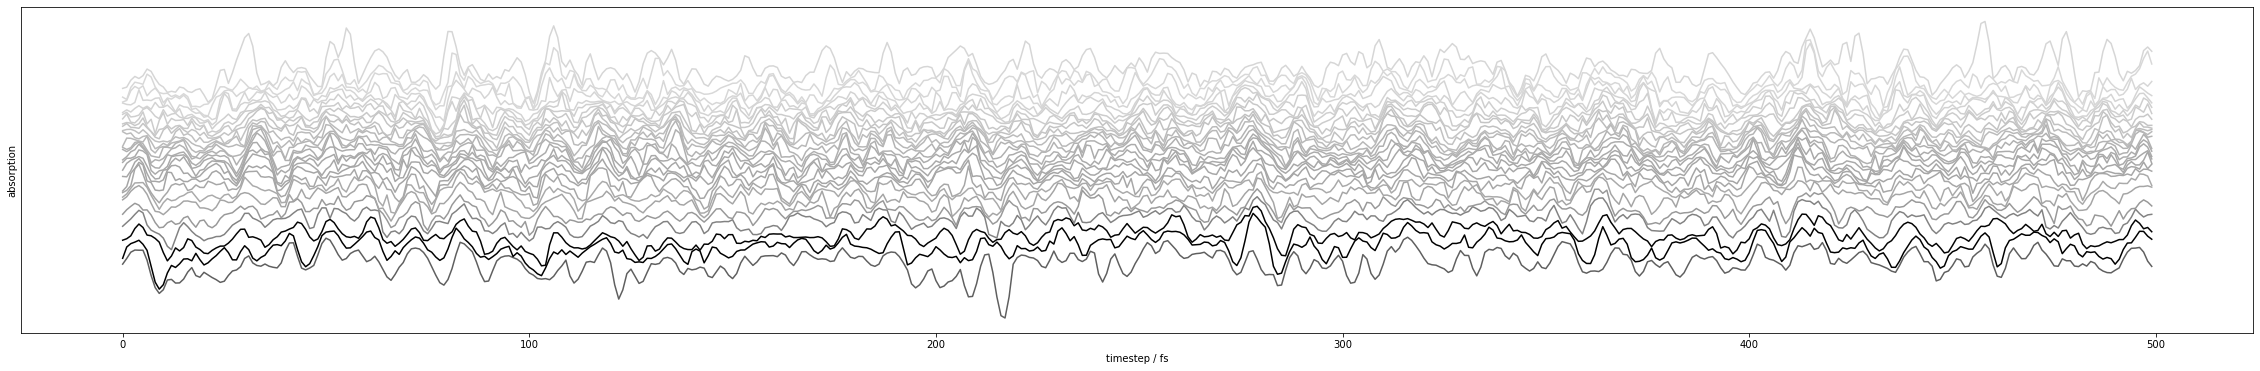

In [25]:
fig, ax = plt.subplots(figsize=(40, 6))

average_sphere = np.array([np.mean(spheres[:, i]) for i in range(27)])

for i in range(1, 28):
    ax.plot((LHII_data["eigval"][:, i] - LHII_data["eigval"][:, 0])[:500], color=f"{1- average_sphere[i-1]/np.max(average_sphere)}")

ax.set_xlabel("timestep / fs")
ax.set_ylabel("absorption")
ax.set_yticks([]);

plt.savefig("../images/abs_prob_by_time.png")

In [6]:
average_sphere = np.array([np.mean(spheres[:, i]) for i in range(27)])
average_light = np.array([np.mean(lights[:, i]) for i in range(27)])

sphere_std = np.array([np.std(spheres[:, i]) for i in range(27)])
light_std = np.array([np.std(lights[:, i]) for i in range(27)])

average_val = np.array([np.mean(LHII_data["eigval"][:, i] - LHII_data["eigval"][:, 0])  for i in range(1, 28)])

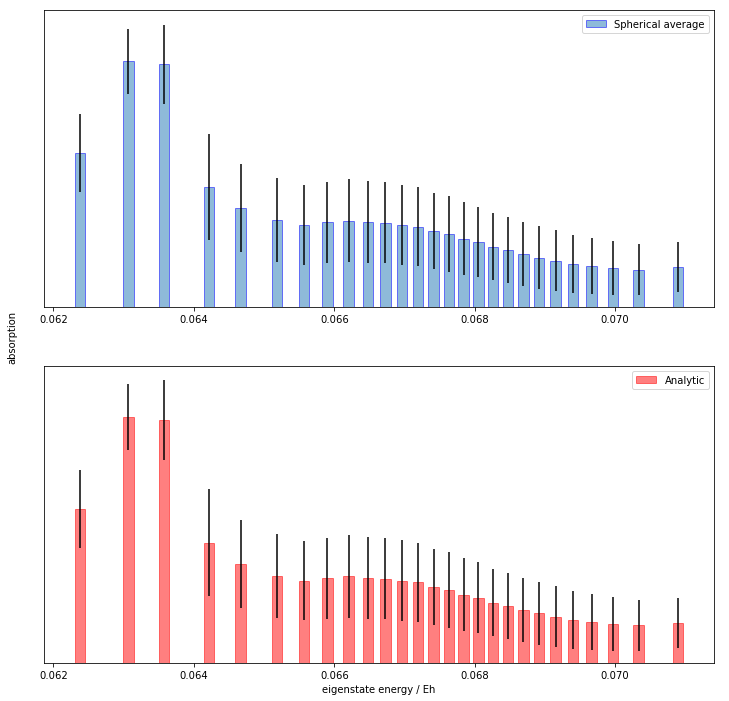

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax0.bar(average_val, average_sphere, yerr=sphere_std, align='center', width=0.00015, alpha=0.5, edgecolor='blue', label='Spherical average')
ax1.bar(average_val, average_light, yerr=light_std, align='center', width=0.00015, alpha=0.5, color='red', edgecolor='red', label='Analytic')

fig.set_size_inches(12, 12)

ax.set_xlabel("eigenstate energy / Eh")
ax.set_ylabel("absorption")

ax0.legend()
ax1.legend()

ax0.set_yticks([])
ax1.set_yticks([]);

plt.savefig("../images/abs_prob_by_energy.png")